In [110]:
import os
import numpy as np
from helpers import *
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from deep_NN import *

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_h5_data()

In [97]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
num_px

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


64

Cost after iteration 0: 0.753646
Cost after iteration 100: 0.473657
Cost after iteration 200: 0.379757


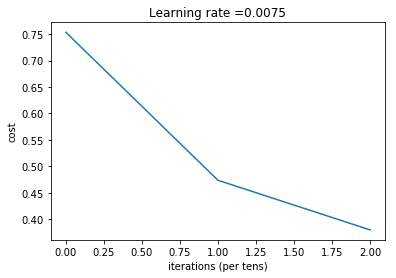

In [52]:
layers_size = [12288,128, 64, 16, 4, 1]
parameters = deep_NN_model(train_x, train_y, layers_size, learning_rate=0.0075, n_iters=300)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

In [ ]:
predictions_test = predict(test_x, test_y, parameters)

(12288, 300)
(1, 300)


ValueError: Colormap rgb is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

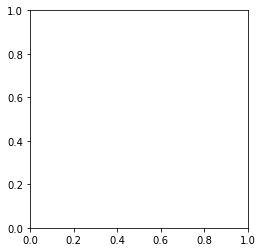

In [113]:
N = 300

Y = np.array([])#, dtype=np.int64).reshape((num_px*num_px*3,1))
X = np.empty((num_px*num_px*3,1))


dataset_dir = '/home/matt/work/dev/ml/datasets/cats_and_dogs/'
counter = 0
# Fill classes array: 1 m_px* cat, 0 - dog
for _file in os.listdir(dataset_dir + 'train/'):
    if counter >= N:
        break
    filename, ext = os.path.splitext(_file)
    
    # Set labels
    _class = 1 if filename.startswith('cat') else 0
    Y = np.append(Y, _class)
    
    # Get image and resize it
    fname = dataset_dir + 'train/' + filename+ext
    image = np.array(ndimage.imread(fname, flatten=False))
    image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
    #print(image.shape)
    #print(X.shape)
    X = np.hstack((X, image))
    counter += 1
    #print(counter)
    
# Delete the first element which was added due to shapes mismatching
X = np.delete(X, 0, 1)
# Reshape Y to the form of (1, m)
Y = Y.reshape((1, Y.shape[0]))
print(X.shape)
print(Y.shape)

plt.imshow(X[:,0].reshape(64,64,3))

In [56]:
my_image = "cat.100.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = '/home/matt/work/dev/ml/datasets/cats_and_dogs/train/' + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

print(my_image.shape)

#plt.imshow(image)
print ('\"' + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

Accuracy: 0.0
(12288, 1)
"non-cat" picture.
